# Big Data are Everywhere

*... but it is expensive to train on them ...*

Loading a pretrained model on the Imagenet dataset (it might take a month to train a model on Imagenet using a single GPU)

In [1]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras.applications as apps

model = apps.densenet.DenseNet201(include_top=True, weights='imagenet', classes=1000)

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


84082688/84080072 [==============================] - 181s 2us/step


In [2]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

Load an image to classify:


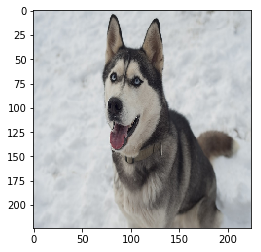

In [7]:
image = load_img('husky.jpg', target_size=(224, 224))
image = img_to_array(image)

plt.imshow(np.uint8(image))


Before feeding the image into the model we must use the same preprocessing. Hopefully, keras makes this very easy:

In [8]:
# Preprocessing the image
image_processed = apps.densenet.preprocess_input(image)
image_processed = image_processed.reshape((1, 224, 224, 3))

# Get the predictions
from time import time
start_time = time()
predictions = model.predict([image_processed])
end_time = time()
print("feed forward time = ", (end_time-start_time), "s")
print("Predictions shape:", predictions.shape)



feed forward time =  0.042426109313964844 s
Predictions shape: (1, 1000)


In [9]:
# Keras also provides a handy decoding utility
labels = apps.densenet.decode_predictions(predictions)[0]

for _, label, prob in labels:
    print(label, " (prob:", prob*100, "%)")


40960/35363 [==================================] - 0s 8us/step
Eskimo_dog  (prob: 75.44094920158386 %)
Siberian_husky  (prob: 10.359690338373184 %)
dogsled  (prob: 7.316608726978302 %)
malamute  (prob: 3.7544474005699158 %)
German_shepherd  (prob: 1.2448669411242008 %)


The *knowledge* contained in these pretrained models can be used to perform *transfer learning*, i.e., adjust the model for a different task. This can be especially useful when large annotated datasets do not exist for the task at hand. Also, you may not want to back-propagate gradients to the first few convolutional layers (or use a very small learning rate).